In [1]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x*(x-1.5)

# python implementation of the following optimization methods

## Unrestrıcted search method with fixed step size

In [3]:
def search_with_fixe_step(f, x_init = 0 ,step = 0.05):
    """
    parameter :
            x_init = initial value of x
            step = step size (x_i - x_{i-1})
            fun = Objective Function
    return :
            interval of uncertainty before Termination of Unrestrıcted search method with fixed step size
    """
    f1 = f(x_init)
    f2 = f(x_init+step)
    if f2 < f1 :
        x_init = x_init + step
        while True :
            f1 = f2
            f2 = f(x_init+step)
            if f2 < f1 :
                x_init = x_init + step
            else :
                return (x_init - step, x_init+ step)
    elif f1 < f2 :
        x_init = x_init - step
        while True :
            f1 = f(x_init)
            f2 = f(x_init-step)
            if f1 > f2 :
                x_init = x_init - step
            else :
                return ( x_init - step, x_init + step)
    else :
        return (x_init - step,x_init + step)
    

## Unrestrıcted search method with accelerated step size

In [4]:
def search_with_accelerat_step(f, x_init = 0, step = 0.001):
    """
    parameter :
            x_init = initial value of x
            step = step size (x_i - x_{i-1})
            fun = Objective Function
    return :
            interval of uncertainty before Termination of Unrestrıcted search method with fixed step size
    """
    f1 = f(x_init)
    f2 = f(x_init+step)
    if f2 < f1 :
        x_init = x_init + step
        while True :
            f1 = f2
            f2 = f(x_init+step)
            if f2 < f1 :
                x_init = x_init + step
                step = 2*step
            else :
                return (x_init - step/2 , x_init + step)
    elif f1 < f2 :
        x_init = x_init - step
        while True :
            f1 = f(x_init)
            f2 = f(x_init-step)
            if f1 > f2:
                x_init = x_init - step
                step = 2*step
            else :
                return ( x_init-step, x_init + step/2)
    else :
        return (x_init - step,x_init + step)

##  Exhaustive search method

In [5]:
def exhaustive_Search(fun, a, b, n):
    """
    parameter :
            a = lower bound
            b = Upper bound
            n = Number of Intermediate Points
            fun = Objective Function
    return :
            x1 = Lower bound given by Exhaustive Search Method
            x2 = Upper bound given by Exhaustive Search Method
            iter_ = Number of Iterations before Termination
    """
    delta = (b-a)/n
    x1 = a
    x2 = x1 + delta
    x3 = x2 + delta
    fx1 = fun(x1)
    fx2 = fun(x2)
    fx3 = fun(x3)
    iter_ = 0
    while fx1>=fx2 and  fx2>=fx3 :
        x1 = x2
        x2 = x3
        x3 = x3 + delta
        fx1 = fx2
        fx2 = fx3
        fx3 = fun(x3)
        iter_ = iter_ + 1 
    return x1, x2, iter_

## Dichotomous search method

In [6]:
def dichotomous_Search(f,x_l, x_u , delta, eps = 1e-4, max_iter = 1000):
    """
    parameter :
            x_l = lower bound
            x_u = Upper bound
            dleta = small positive number
            eps = final long of the interval of uncertainty
            max_iter = max Number of Iterations
            f = Objective Function
    return :
            x_l = Lower bound given by Dichotomous search method
            x_u = Upper bound given by Dichotomous search method
            iter_ = Number of Iterations before Termination
            l = long of the interval of uncertainty before Termination
    """
    iter_ = 0
    l = x_u - x_l
    while l > eps and iter_ < max_iter :
        l = x_u - x_l
        xc = (x_u + x_l)/2
        x1 = xc - delta/2
        x2 = xc + delta/2
        fx1 = f(x1)
        fx2 = f(x2)
        if fx1 < fx2 :
            x_u = x2
        elif fx1 > fx2 :
            x_l = x1
        else :
            x_u = x2
            x_l = x1
        iter_ = iter_ + 1
    return x_l, x_u, iter_, l

##  Interval halving method

In [7]:
def interval_Halving(f,x_l, x_u, eps = 1e-4, max_iter = 1000):
    """
    parameter :
            x_l = lower bound
            x_u = Upper bound
            eps = final long of the interval of uncertainty
            max_iter = max Number of Iterations
            f = Objective Function
    return :
            x_l = Lower bound given by Dichotomous search method
            x_u = Upper bound given by Dichotomous search method
            iter_ = Number of Iterations before Termination
            l = long of the interval of uncertainty before Termination
    """
    iter_ = 0
    l = x_u - x_l
    while l > eps and iter_ < max_iter :
        l = x_u - x_l
        x0 = (x_u + x_l)/2
        x1 = x0 - l/4
        x2 = x0 + l/4
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        if fx1 <fx0 < fx2 :
            x_u = x0
        elif fx1 > fx0> fx2 :
            x_l = x0
        elif fx0 < fx1 and fx0 < fx2 :
            x_u = x2
            x_l = x1
        iter_ = iter_ + 1
    return x_l, x_u, iter_, l

##  Fibonacci method

In [8]:
def fib(n):
    f0 = 1
    f1 = 1
    f =0
    for i in range(2, n+1):
        f = f0 + f1
        f0 = f1
        f1 = f
    return f1

In [9]:
def Fibonacci(f, x_l, x_u, n):
    """
    parameter :
            x_l = lower bound
            x_u = Upper bound
            n = 
            f = Objective Function
    return :
            x_l = Lower bound given by Fibonacci method
            x_u = Upper bound given by Fibonacci method
            l = long of the interval of uncertainty before Termination
    """
    l = x_u - x_l
    x1 = x_l + (fib(n-2)/ fib(n))*l
    x2 = x_l + (fib(n-1)/ fib(n))*l
    while n>1 :
        n = n - 1
        f1 = f(x1)
        f2 = f(x2)
        if f1 < f2 :
            x_u = x2
            l = x_u - x_l
            x2 = x1
            x1 = x_l + (fib(n-2)/ fib(n))*l
            f2 = f1
            f1 = f(x1)
        elif f1 > f2 :
            x_l = x1
            l = x_u - x_l
            x1 = x2
            f1 = f2
            x2 = x_l + (fib(n-1)/ fib(n))*l
            f2 = f(x2)
    return x_l , x_u , l

## Golden section method

In [10]:
def golden_Section(f, x_l, x_u, eps):
    """
    parameter :
            x_l = lower bound
            x_u = Upper bound
            eps = 
            f = Objective Function
    return :
            x_l = Lower bound given by Fibonacci method
            x_u = Upper bound given by Fibonacci method
            l = long of the interval of uncertainty before Termination
    """
    phi = 2/( 1 + math.sqrt(5) ) 
    l = x_u - x_l
    x1 = x_l + (phi**2)*l
    x2 = x_l + phi*l
    f1 = f(x1)
    f2 = f(x2)
    while l > eps :
        if f1 < f2 :
            x_u = x2
            l = x_u - x_l
            x2 = x1
            x1 = x_l + (phi**2)*l
            f2 = f1
            f1 = f(x1)
        elif f1 > f2 :
            x_l = x1
            l = x_u - x_l
            x1 = x2
            f1 = f2
            x2 = x_l + phi*l
            f2 = f(x2)
    return x_l , x_u , l

# compute the running time for each method

In [11]:
methods_name = [
    'Unrestrıcted search method with fixed step size',
    'Unrestrıcted search method with accelerated step size',
    'Exhaustive search method',
    'Dichotomous search method',
    'Interval halving method',
    'Fibonacci method',
    'Golden section method'
]
time_of_methods = []

In [12]:
t1 = time.time()
search_with_fixe_step(f, x_init = 0 ,step = 0.00005)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.008139610290527344


In [13]:
t1 = time.time()
search_with_accelerat_step(f, x_init = 0, step = 0.00005)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.0010001659393310547


In [14]:
t1 = time.time()
exhaustive_Search(f, 0.0, 1.0, 10000)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.0055294036865234375


In [15]:
t1 = time.time()
dichotomous_Search(f,0.0, 1.0 , 0.01, eps = 1e-9, max_iter = 10000)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.009972333908081055


In [16]:
t1 = time.time()
interval_Halving(f,0.0, 1.0 , eps = 1e-9, max_iter = 10000)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.024933576583862305


In [17]:
t1 = time.time()
Fibonacci(f, 0.0, 1.0, 50)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.0


In [18]:
t1 = time.time()
golden_Section(f, x_l= 0.0, x_u = 1.0, eps = 1e-5)
t2 = time.time()
print(t2-t1)
time_of_methods.append(t2-t1)

0.000995635986328125


In [19]:
time_of_methods

[0.008139610290527344,
 0.0010001659393310547,
 0.0055294036865234375,
 0.009972333908081055,
 0.024933576583862305,
 0.0,
 0.000995635986328125]

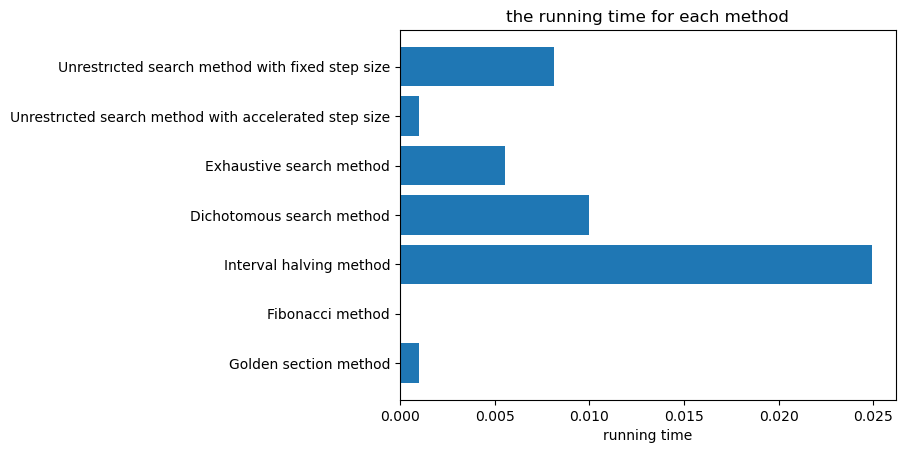

In [23]:
fig, ax = plt.subplots()
y = np.arange(len(methods_name))
ax.barh(y ,time_of_methods, align='center')
ax.set_yticks(y, labels=methods_name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('running time')
ax.set_title('the running time for each method')

plt.show()